# Import packages

In [1]:
from google.colab import drive, auth
auth.authenticate_user()
import requests
gcloud_token = !gcloud auth print-access-token
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
with open('/content/drive/My Drive/Colab Notebooks/Assignment_2_Script.py') as infile:
    exec(infile.read())

# Function Definitions

In [0]:
def Build2DHistogramClassifier(X,T,B,xmin,xmax):
    HF=np.zeros([B,B]).astype('int32');
    HM=np.zeros([B,B]).astype('int32');
    RC=(np.round(((B-1)*(X-xmin)/(xmax-xmin)))).astype('int32');
    for i,rc in enumerate(RC):
        if T[i]=='Female':
            HF[rc[0],rc[1]]+=1;
        else:
            HM[rc[0],rc[1]]+=1;
    return [HF, HM]

In [0]:
def Apply2DHistogramClassifier(queries,HF,HM,xmin,xmax):
    B=np.alen(HF);
    RC=(np.round(((B-1)*(queries-xmin)/(xmax-xmin)))).astype('int32');
    countF=HF[RC[:,0],RC[:,1]];
    countM=HM[RC[:,0],RC[:,1]];
    resultlabel=np.full(np.alen(RC),"Indeterminate",dtype=object);
    resultprob=np.full(np.alen(RC),np.nan,dtype=object);
    indicesF=countF>countM;
    indicesM=countM>countF;
    resultlabel[indicesF]="Female";
    resultlabel[indicesM]="Male";
    probF=countF/(countF+countM);
    probM=countM/(countF+countM);
    resultprob[indicesF]=probF[indicesF];
    resultprob[indicesM]=probM[indicesM];
    return resultlabel, resultprob

In [0]:
def Build2DBayesianClassifier(X,T):
    muF=np.mean(X[T=='Female'],axis=0);
    muM=np.mean(X[T=='Male'],axis=0);
    sigmaF=np.cov(X[T=='Female'],rowvar=False);
    sigmaM=np.cov(X[T=='Male'],rowvar=False);
    NF=len(T[T=='Female']);
    NM=len(T[T=='Male']);
    return [muF,muM,sigmaF,sigmaM,NF,NM]

In [0]:
def pdf(x,mu,sigma):
    d=np.alen(mu)
    dfact1=(2*np.pi)**d
    dfact2=np.linalg.det(sigma)
    fact=1/np.sqrt(dfact1*dfact2)
    xc=x-mu
    isigma=-0.5*np.linalg.inv(sigma)
    if len(np.shape(x)) == 1:
      return fact*np.exp(np.dot(np.dot(xc, isigma),xc))
    else:
      return fact\
        *np.exp(
            [np.dot(np.dot(v, isigma),v) for v in xc]
        )

In [0]:
def Apply2DBayesianClassifier(queries,muF,MuM,sigmaF,sigmaM,NF,NM):
    A=1;
    countF=NF*A*pdf(queries,muF,sigmaF)
    countM=NM*A*pdf(queries,muM,sigmaM)
    resultlabel=np.full(np.alen(queries),"Indeterminate",dtype=object);
    resultprob=np.full(np.alen(queries),np.nan,dtype=object);
    indicesF=countF>countM;
    indicesM=countM>countF;
    resultlabel[indicesF]="Female";
    resultlabel[indicesM]="Male";
    probF=countF/(countF+countM);
    probM=countM/(countF+countM);
    resultprob[indicesF]=probF[indicesF];
    resultprob[indicesM]=probM[indicesM];
    return resultlabel, resultprob

# Prepare data

In [0]:
excelfile = '/content/drive/My Drive/Data/Assignment_2_Data_and_Template.xlsx'

In [9]:
sheets=getSheetNames(excelfile);sheets

['Data',
 'Female Histogram',
 'Male Histogram',
 'Bayesian',
 'Queries',
 'Reconstructed Female Histogram',
 'Reconstructed Male Histogram',
 'Observations',
 'ID']

In [0]:
data=readExcel(excelfile)
X=np.array(data[:,1:],dtype=float);T=data[:,0];

In [11]:
queries=(readExcel(excelfile,
                  sheetname='Queries',
                  startrow=3,
                  endrow=6,
                  startcol=1,
                  endcol=2)).astype(float);queries

array([[69. , 17.5],
       [66. , 22. ],
       [70. , 21.5],
       [69. , 23.5]])

# Histogram Classifier

In [0]:
B=10;
xmin=np.amin(X,axis=0);
xmax=np.amax(X,axis=0);
[HF,HM]=Build2DHistogramClassifier(X,T,B,xmin,xmax);

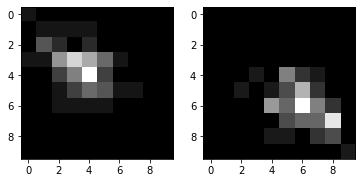

In [13]:
show2DHistograms(HF, HM)

In [0]:
[htF, hsF] = X[T=='Female'].T
[htM, hsM] = X[T=='Male'].T

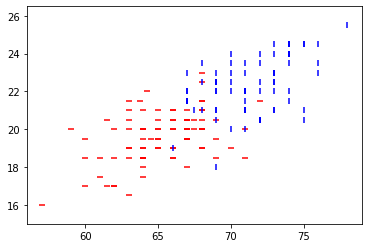

In [15]:
plt.scatter(htF, hsF, marker='_', color='r')
plt.scatter(htM, hsM, marker='|', color='b')
plt.xlim(xmin[0]-1,xmax[0]+1)
plt.ylim(xmin[1]-1,xmax[1]+1)
plt.show()

In [16]:
[GH, PH]=Apply2DHistogramClassifier(queries,HF,HM,xmin,xmax)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


In [17]:
showResult(queries, GH, PH)

   Query (Height)  Query (Handspan)         Gender Probability
0            69.0              17.5  Indeterminate         NaN
1            66.0              22.0           Male           1
2            70.0              21.5           Male         0.8
3            69.0              23.5           Male    0.666667


# Bayesian Classifier

In [0]:
[muF,muM,sigmaF,sigmaM,NF,NM]=Build2DBayesianClassifier(X,T)

In [0]:
[GB, PB]=Apply2DBayesianClassifier(queries,muF,muM,sigmaF,sigmaM,NF,NM)

In [20]:
showResult(queries, GB, PB)

   Query (Height)  Query (Handspan)  Gender Probability
0            69.0              17.5  Female    0.898536
1            66.0              22.0  Female    0.655579
2            70.0              21.5    Male    0.801143
3            69.0              23.5    Male    0.943548


In [21]:
showAllResults(queries, GH, PH, GB, PB)

,Query (Height),Query (Handspan),GH,PH,GB,PB
0,69.0,17.5,Indeterminate,NaN,Female,0.898536
1,66.0,22.0,Male,1,Female,0.655579
2,70.0,21.5,Male,0.8,Male,0.801143
3,69.0,23.5,Male,0.666667,Male,0.943548


In [22]:
check_all_vars(all_vars)

xmin exists.
xmax exists.
HF exists.
HM exists.
muF exists.
muM exists.
sigmaF exists.
sigmaM exists.
NF exists.
NM exists.
GH exists.
PH exists.
GB exists.
PB exists.


In [23]:
print("Please wait. Writing to Excel ...")
writeExcelData([xmin[0],xmax[0],xmin[1],xmax[1]],excelfile,'Female Histogram',1,2)
writeExcelData([str(B)+'x'+str(B)],excelfile,'Female Histogram',6,2)
writeExcelData(HF,excelfile,'Female Histogram',7,2)
print("Written Sheet \'Female Histogram\'")

writeExcelData([xmin[0],xmax[0],xmin[1],xmax[1]],excelfile,'Male Histogram',1,2)
writeExcelData([str(B)+'x'+str(B)],excelfile,'Male Histogram',6,2)
writeExcelData(HM,excelfile,'Male Histogram',7,2)
print("Written Sheet \'Male Histogram\'")

writeExcelData([muF,muM],excelfile,'Bayesian',1,3)
writeExcelData(np.concatenate((sigmaF,sigmaM)),excelfile,'Bayesian',4,3)
writeExcelData([NF,NM],excelfile,'Bayesian',9,3)
print("Written Sheet \'Bayesian\'")

writeExcelData(list(zip(*[GH,PH,GB,PB])),excelfile,'Queries',3,3)
print("Written Sheet \'Queries\'")

closeExcelFile(excelfile)
print("DONE!")



Please wait. Writing to Excel ...
Written Sheet 'Female Histogram'
Written Sheet 'Male Histogram'
Written Sheet 'Bayesian'
Written Sheet 'Queries'
DONE!


SKIP THE FOLLOWING IF YOU ARE NOT ATTEMPTING THE EXTRA CREDIT SECTION

In [0]:
# writeExcelData([xmin[0],xmax[0],xmin[1],xmax[1]],excelfile,'Reconstructed Female Histogram',1,2)
# writeExcelData([str(B)+'x'+str(B)],excelfile,'Reconstructed Female Histogram',6,2)
# writeExcelData(HFrec,excelfile,'Reconstructed Female Histogram',7,2)
# print("Written Sheet \'Reconstructed Female Histogram\'")

# writeExcelData([xmin[0],xmax[0],xmin[1],xmax[1]],excelfile,'Reconstructed Male Histogram',1,2)
# writeExcelData([str(B)+'x'+str(B)],excelfile,'Reconstructed Male Histogram',6,2)
# writeExcelData(HMrec,excelfile,'Reconstructed Male Histogram',7,2)
# print("Written Sheet \'Reconstructed Male Histogram\'")